In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_city = 'city_data.csv'
file_ride = 'ride_data.csv'

file_city_pd = pd.read_csv(file_city)
file_city_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
file_ride_pd = pd.read_csv(file_ride)
file_ride_pd.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
file_merged = pd.merge(file_ride_pd,file_city_pd, on='city')
file_merged.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


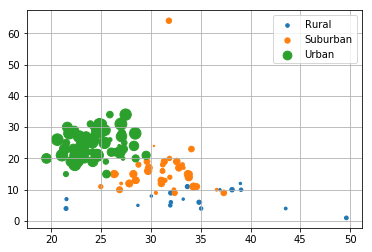

In [8]:
averagefare_city = pd.DataFrame(file_merged.groupby("city")["fare"].mean())
averagefare_city.reset_index(inplace=True)
totalride_city =  pd.DataFrame(file_merged.groupby("city")["ride_id"].count())
totalride_city.reset_index(inplace=True)

firstmerged_pd = pd.merge(averagefare_city,totalride_city, on ='city')
bubblemerged_pd = pd.merge(firstmerged_pd,file_city_pd, on='city')
bubblemerged_pd = bubblemerged_pd.rename(columns={"fare":"Average Fare($)", "ride_id":"Total Number of Rides(Per City)","driver_count":"Driver Count"})
fig, ax = plt.subplots()
for c, bubblemerged_pd in bubblemerged_pd.groupby('type'):
    ax.scatter(bubblemerged_pd['Average Fare($)'], bubblemerged_pd['Total Number of Rides(Per City)'], s=bubblemerged_pd ['Driver Count']*2,label=c)

    
#Bubble sizelari driver counta gore yapilacak    

#bubblemerged_pd = bubblemerged_pd.rename(columns={"fare":"Average Fare($)", "ride_id":"Total Number of Rides(Per City)","driver_count":"Driver Count"})
#bubblemerged_pd.plot.scatter(x='Average Fare($)', y='Total Number of Rides(Per City)', s=bubblemerged_pd ['Driver Count']*2,
#                            title="Pyber Ride Sharing Data",color=colors[key])
plt.legend()
plt.grid()
plt.show()

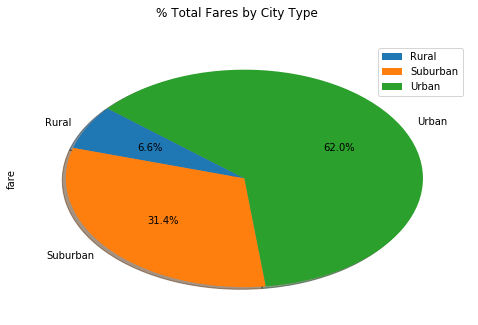

In [9]:
#totalfares_type = pd.pivot_table(file_merged, values='')

totalfares_type= pd.DataFrame(file_merged.groupby("type")["fare"].sum())
totalfares_type

totalfares_type.plot.pie(subplots=True,figsize=(8,5),title='% Total Fares by City Type',
                         autopct="%1.1f%%",shadow=True, startangle=140,fontsize=10,legend ='best')
plt.show()

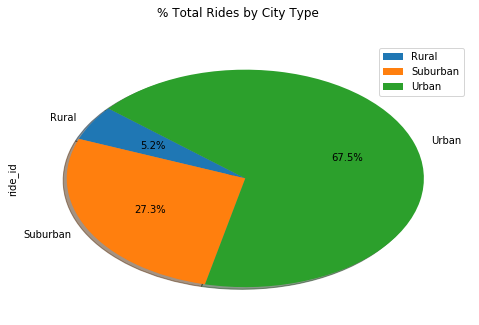

In [10]:
totalrides_type= pd.DataFrame(file_merged.groupby("type")["ride_id"].count())
totalrides_type

totalrides_type.plot.pie(subplots=True,figsize=(8,5),title='% Total Rides by City Type',autopct="%1.1f%%", 
                         shadow=True, startangle=140,fontsize=10,legend ='best')
plt.show()

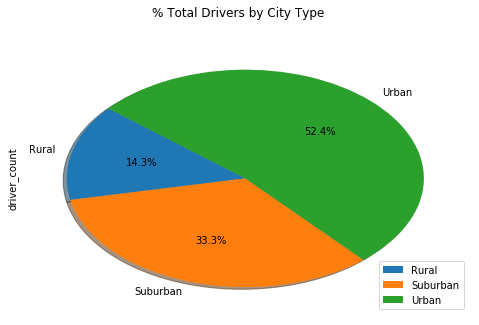

In [11]:
totaldrivers_type= pd.DataFrame(file_city_pd.groupby("type")["driver_count"].count())
totaldrivers_type

totaldrivers_type.plot.pie(subplots=True,figsize=(8,5),title='% Total Drivers by City Type',
                           autopct="%1.1f%%", shadow=True, startangle=140,fontsize=10,legend ='best')
plt.show()